In [1]:
import numpy as np
from scipy.ndimage import shift
from skimage.registration import phase_cross_correlation
from skimage.transform import resize
from skimage import io
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def crop_border(img: np.ndarray, margin: float) -> np.ndarray:
    return img[margin:-margin, margin:-margin]

#### Read images

In [3]:
hr = io.imread('imgset0597/hr.png')
lr = io.imread('imgset0597/lr/LR001.png')

Shift between hr and lr resized to hr

In [4]:
lr2hr = resize(lr, hr.shape)
s = phase_cross_correlation(lr2hr, hr, upsample_factor=100)[0]
s

array([2.39, 2.05])

#### Visualize before registration

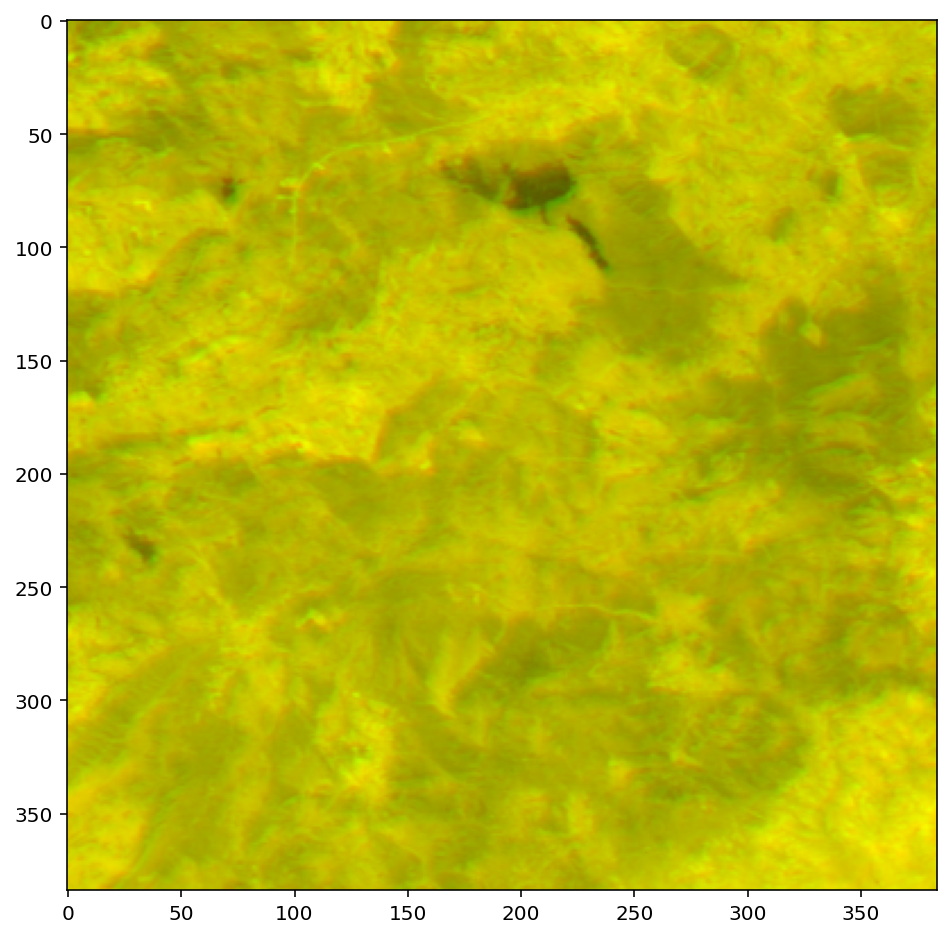

In [5]:
cpr = np.stack((lr2hr / lr2hr.max(), hr / hr.max(), np.zeros((384, 384))), axis=2)
plt.figure(figsize=(12,8))
plt.imshow(cpr)
plt.show()

#### Visualize after registration

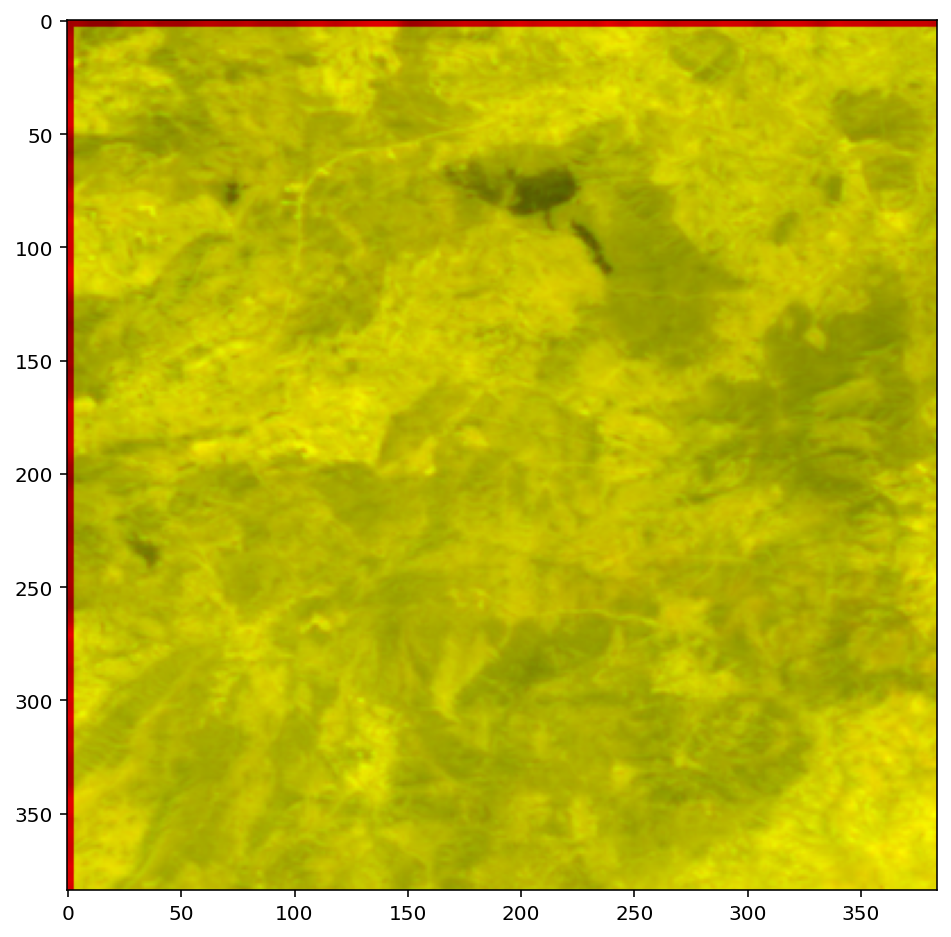

In [6]:
shifted = shift(hr, s)
cpr = np.stack((lr2hr / lr2hr.max(), shifted / shifted.max(), np.zeros((384, 384))), axis=2)
plt.figure(figsize=(12,8))
plt.imshow(cpr)
plt.show()

#### Result of shifting

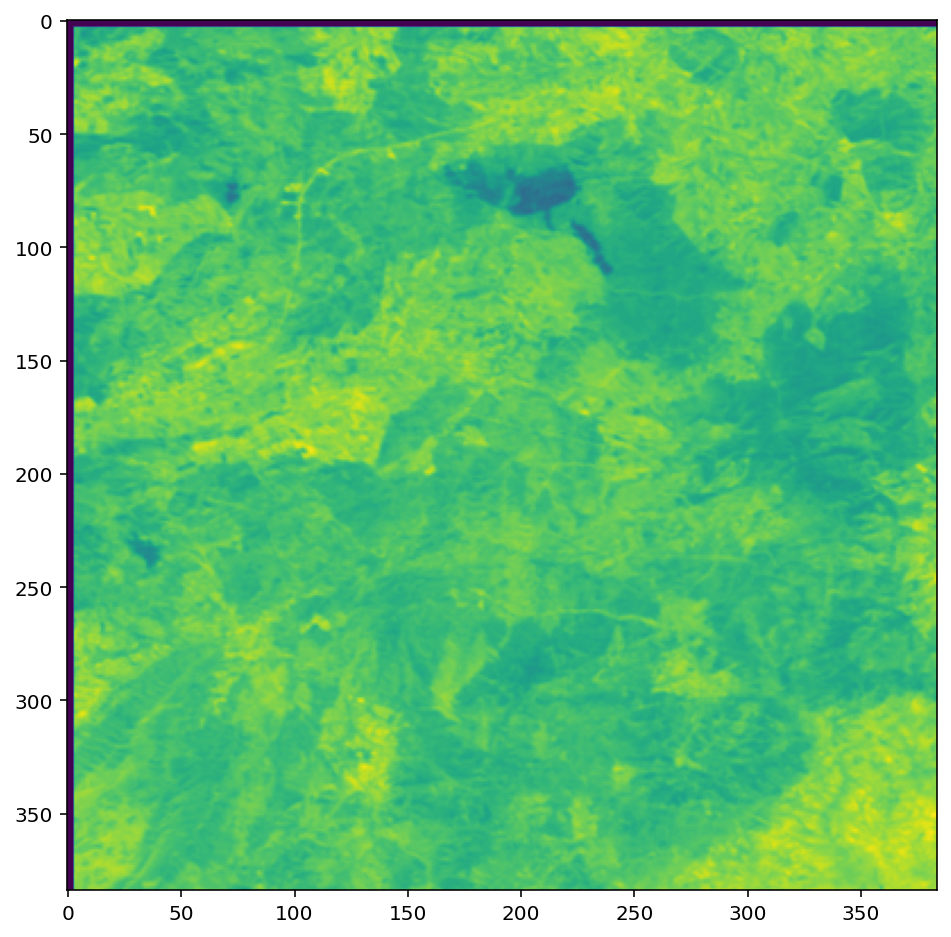

In [7]:
plt.figure(figsize=(12,8))
plt.imshow(shift(hr, s))
plt.show()

#### Compare shifted with target

In [8]:
s = phase_cross_correlation(lr2hr, shifted, upsample_factor=100)
s

(array([0.06, 0.16]), 0.1342277656742226, -7.856854915696064e-08)

#### Save and load image and check values

In [9]:
io.imsave('export.png', shifted)

In [10]:
shifted_loaded = io.imread('export.png')
s = phase_cross_correlation(lr2hr, shifted_loaded, upsample_factor=100)[0]
s

array([0.06, 0.16])

In [11]:
s = phase_cross_correlation(shifted, shifted_loaded, upsample_factor=100)[0]
s

array([0., 0.])

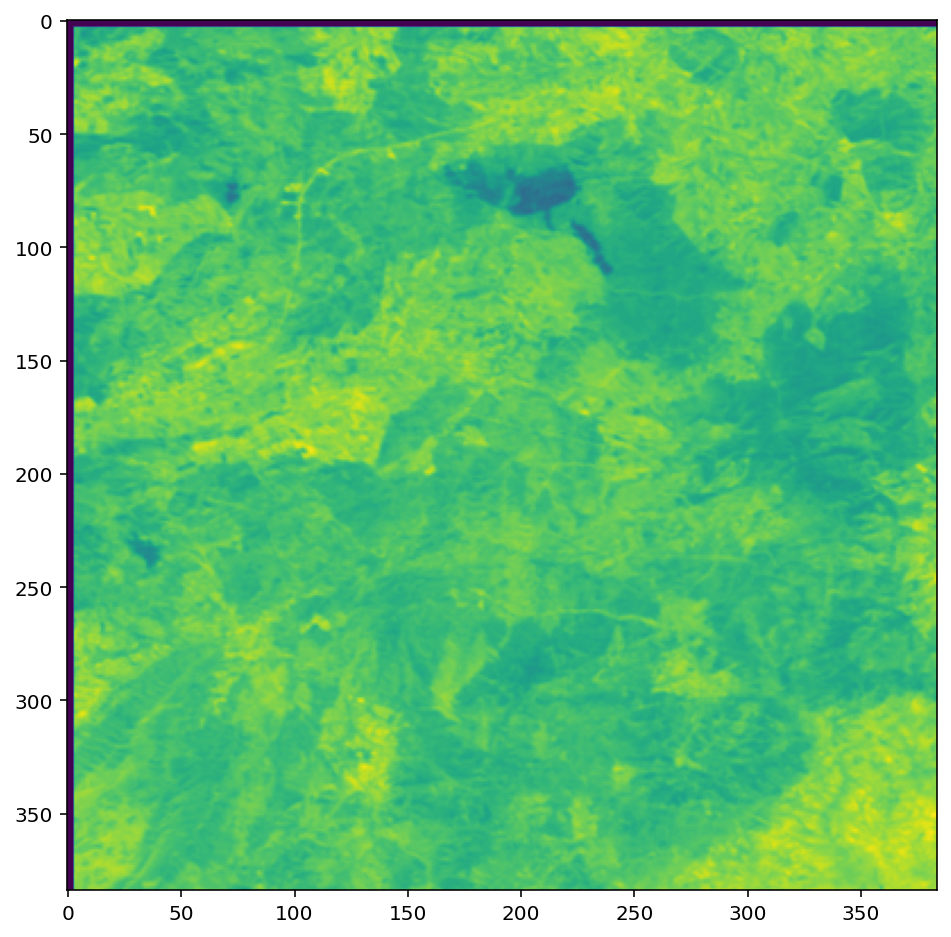

In [12]:
plt.figure(figsize=(12,8))
plt.imshow(shifted_loaded)
plt.show()

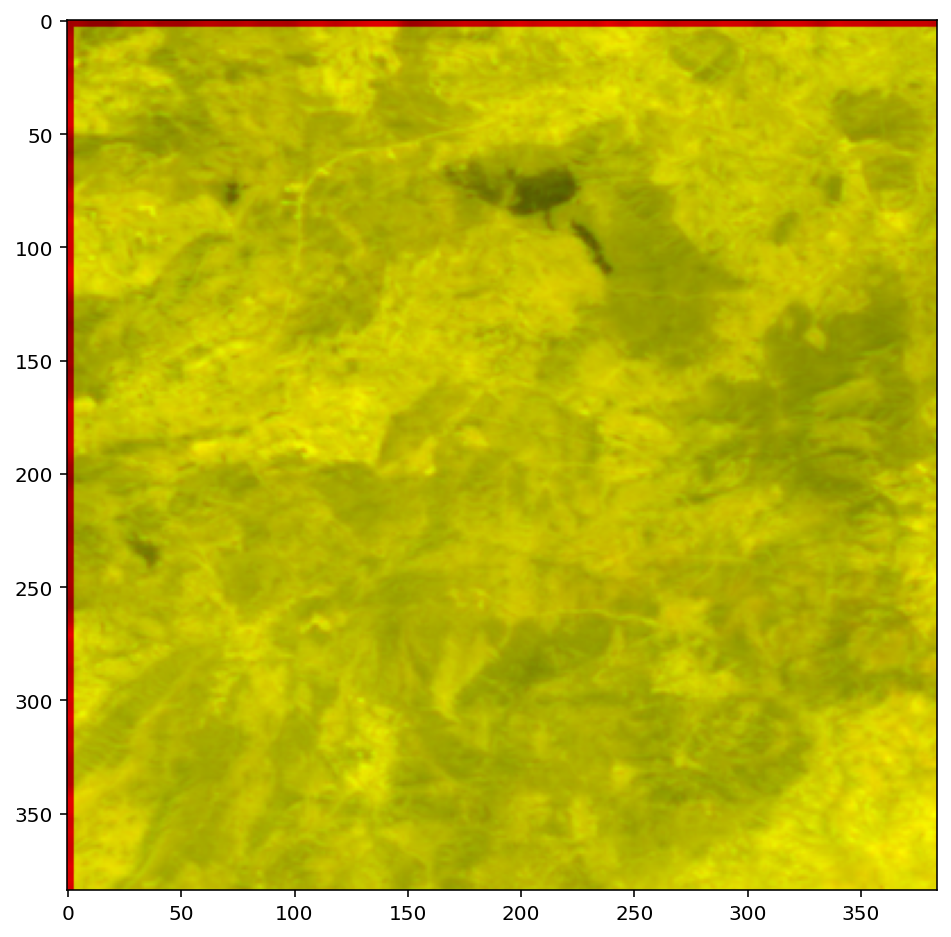

In [13]:
cpr = np.stack((lr2hr / lr2hr.max(), shifted_loaded / shifted_loaded.max(), np.zeros((384, 384))), axis=2)
plt.figure(figsize=(12,8))
plt.imshow(cpr)
plt.show()

#### Sanity test from full export

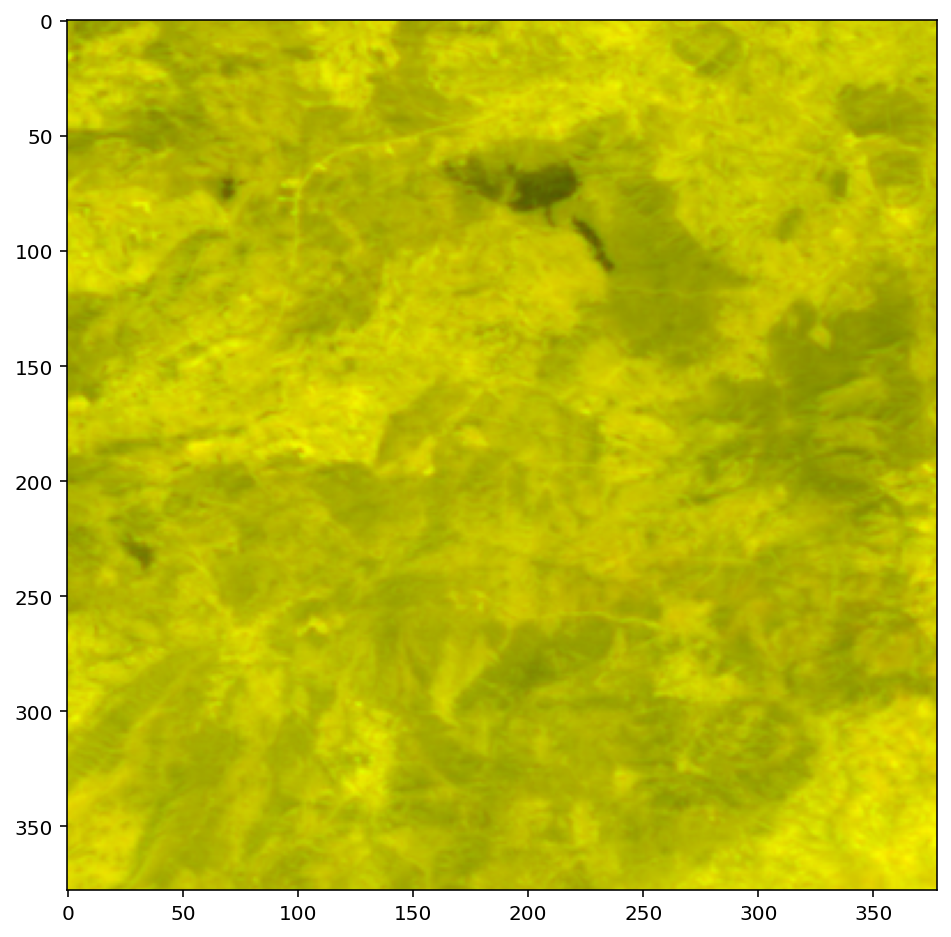

array([0.06, 0.16])

In [15]:
exported_hr = io.imread('imgset0597-export/HR001.png')
s = phase_cross_correlation(lr2hr, shifted_loaded, upsample_factor=100)[0]
cpr = np.stack((crop_border(lr2hr / lr2hr.max(), 3), exported_hr / exported_hr.max(), np.zeros((378, 378))), axis=2)
plt.figure(figsize=(12,8))
plt.imshow(cpr)
plt.show()
s

#### Dodatkowa notka z porównania tego samego obrazka w Probie z share pointa
(array([-0.33, -1.55]), 0.10320879055282571, -3.3931326341892686e-08)

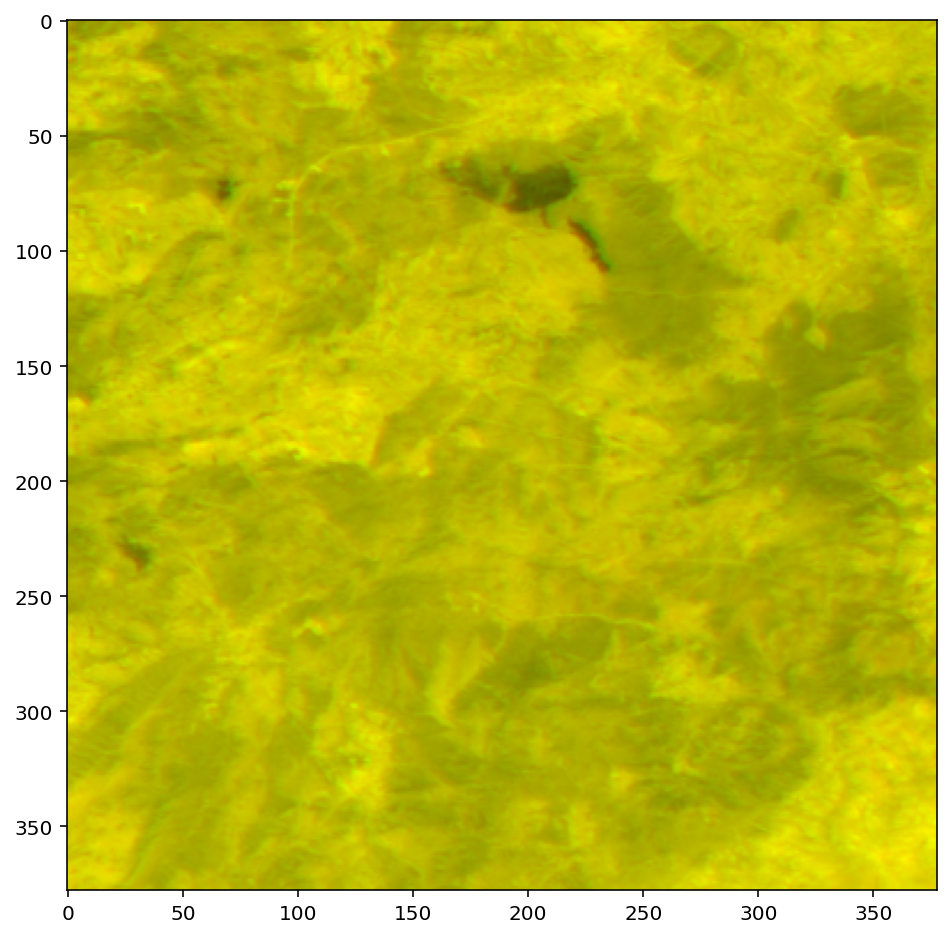

array([-0.49,  2.04])

In [16]:
hr = io.imread('imgset0597-sharepoint/HR001.png')
lr = io.imread('imgset0597-sharepoint/LR001.png')
hr.shape
lr2hr = resize(lr, hr.shape)
s = phase_cross_correlation(lr2hr, hr, upsample_factor=100)[0]
cpr = np.stack((lr2hr / lr2hr.max(), hr / hr.max(), np.zeros(hr.shape)), axis=2)
plt.figure(figsize=(12,8))
plt.imshow(cpr)
plt.show()
s